# Questão 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
originaldata = pd.read_excel('Bases_Final_ADS_Jun2021.xlsx', sheet_name=1)

# Reordering columns, it will be usefull for correlation heatmap
originaldata = originaldata[['data_tidy',
                             'com_co', 'com_n', 'com_ne', 'com_s', 'com_se',
                             'ind_co', 'ind_n', 'ind_ne', 'ind_s', 'ind_se',
                             'res_co', 'res_n', 'res_ne', 'res_s', 'res_se',
                             'renda_r', 'pop_ocup_br', 'massa_r', 'du',
                             'pmc_a_co', 'pmc_a_n', 'pmc_a_ne', 'pmc_a_s', 'pmc_a_se',
                             'pmc_r_co', 'pmc_r_n', 'pmc_r_ne', 'pmc_r_s', 'pmc_r_se',
                             'temp_max_co', 'temp_max_n', 'temp_max_ne', 'temp_max_s',  'temp_max_se',
                             'temp_min_co', 'temp_min_n', 'temp_min_ne', 'temp_min_s', 'temp_min_se',        
                             'pim_co', 'pim_n', 'pim_ne', 'pim_s', 'pim_se']]

# Converting data_tidy to date
originaldata['data_tidy'] = pd.to_datetime(
    originaldata['data_tidy'], format='%y-%m-%d')

# Creating month and year variables, usefull for grouping
originaldata['year'] = pd.DatetimeIndex(originaldata['data_tidy']).year
originaldata['month'] = pd.DatetimeIndex(originaldata['data_tidy']).month

# Assigning index
originaldata.index = originaldata['data_tidy']

# Creating total consumption for country
originaldata['comercial'] = originaldata['com_co'] + originaldata['com_n'] + originaldata['com_ne'] + originaldata['com_s'] + originaldata['com_se']
originaldata['industrial'] = originaldata['ind_co'] + originaldata['ind_n'] + originaldata['ind_ne'] + originaldata['ind_s'] + originaldata['ind_se']
originaldata['residencial'] = originaldata['res_co'] + originaldata['res_n'] + originaldata['res_ne'] + originaldata['res_s'] + originaldata['res_se']
originaldata['total'] = originaldata['comercial'] + originaldata['industrial'] + originaldata['residencial']


originaldata.head(2)

,data_tidy,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,...,pim_n,pim_ne,pim_s,pim_se,year,month,comercial,industrial,residencial,total
data_tidy,,,,,,,,,,,,,,,,,,,,,
2004-01-01,2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.32699,840.29035,2015.78331,1810.98019,...,65.252,87.8,78.497,75.454326,2004,1,4244.83692,12008.85166,6780.68048,23034.36906
2004-02-01,2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.65151,810.25628,1942.01969,1931.86643,...,62.180,78.9,80.047,72.953183,2004,2,4147.27482,12141.41657,6429.23828,22717.92967


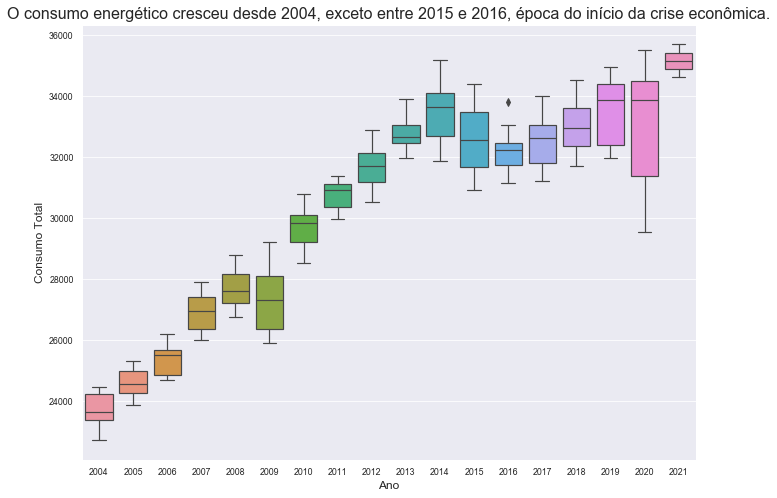

In [36]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":12})  
ax = sns.boxplot(x="year", y="total", data=originaldata[originaldata['year'] != 2022]).set(
    xlabel='Ano',
    ylabel='Consumo Total', 
    title='O consumo energético cresceu desde 2004, exceto entre 2015 e 2016, época do início da crise econômica.')

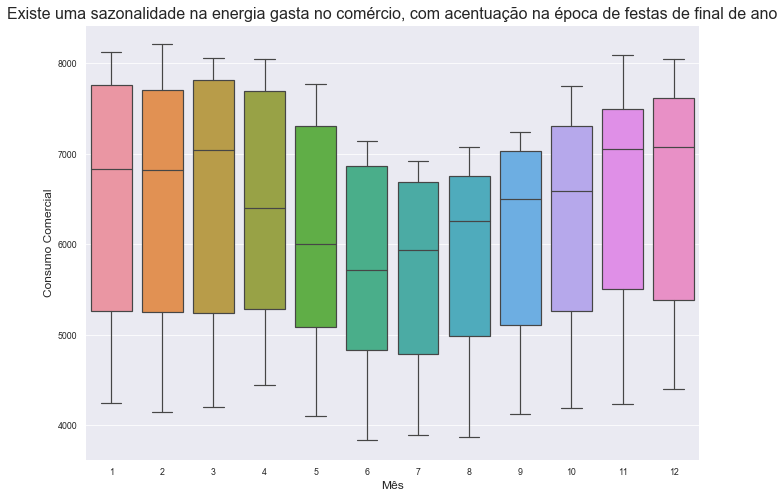

In [46]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":12})  
ax = sns.boxplot(x="month", y="comercial", data=originaldata[originaldata['year'] != 2022]).set(
    xlabel='Mês',
    ylabel='Consumo Comercial', 
    title='Existe uma sazonalidade na energia gasta no comércio, com acentuação na época de festas de final de ano')

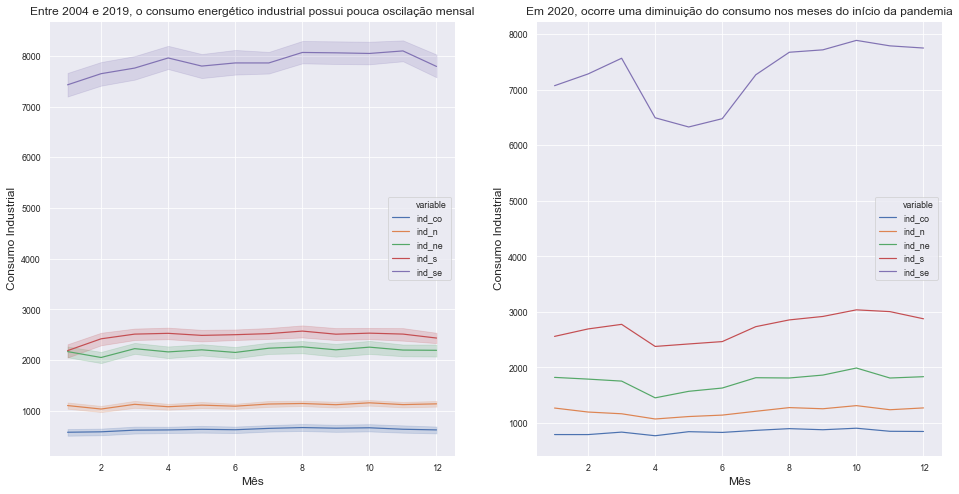

In [92]:
# Preparing 2020 data
data_2020 = originaldata[originaldata['year']==2020]

original = pd.melt(data_2020[['month', 'ind_co']], id_vars=['month'])

for col in data_2020.columns[7:11]:
    cols = ['month'] + [col]

    aux = pd.melt(data_2020[cols], id_vars=['month'])

    original = pd.concat([original, aux], axis=0)
    

# Preparing 2004-2019 data
data_2019 = originaldata[originaldata['year']<=2019]

original2 = pd.melt(data_2019[['month', 'ind_co']], id_vars=['month'])

for col in data_2019.columns[7:11]:
    cols = ['month'] + [col]

    aux = pd.melt(data_2019[cols], id_vars=['month'])

    original2 = pd.concat([original2, aux], axis=0)

# Plot features
sns.set(rc={'figure.figsize': (16, 8)})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
fig, axs = plt.subplots(ncols=2)   

# Plot   
ax = sns.lineplot(data=original2, x="month", y="value", hue="variable", ax=axs[0]).set(
    xlabel='Mês',
    ylabel='Consumo Industrial', 
    title='Entre 2004 e 2019, o consumo energético industrial possui pouca oscilação mensal')
ax = sns.lineplot(data=original, x="month", y="value", hue="variable", ax=axs[1]).set(
    xlabel='Mês',
    ylabel='Consumo Industrial', 
    title='Em 2020, ocorre uma diminuição do consumo nos meses do início da pandemia')

[Text(0, 0.5, 'Consumo Industrial NE'),
 Text(0.5, 0, 'Indicador Comercio Amplo NE'),
 Text(0.5, 1.0, 'Porém, essa correlação não existe para a indústria.')]

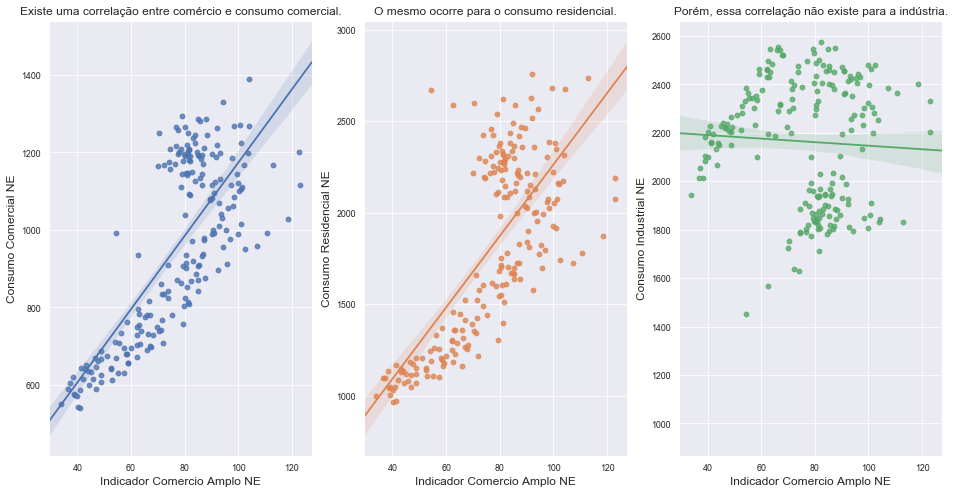

In [104]:
# Plot features
sns.set(rc={'figure.figsize': (16, 8)})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
fig, axs = plt.subplots(ncols=3)   

# Plot
sns.regplot(data=originaldata, x="pmc_a_ne", y="com_ne", ax=axs[0]).set(
    xlabel='Indicador Comercio Amplo NE',
    ylabel='Consumo Comercial NE', 
    title='Existe uma correlação entre comércio e consumo comercial.')
sns.regplot(data=originaldata, x="pmc_a_ne", y="res_ne", ax=axs[1]).set(
    xlabel='Indicador Comercio Amplo NE',
    ylabel='Consumo Residencial NE', 
    title='O mesmo ocorre para o consumo residencial.')
sns.regplot(data=originaldata, x="pmc_a_ne", y="ind_ne", ax=axs[2]).set(
    xlabel='Indicador Comercio Amplo NE',
    ylabel='Consumo Industrial NE', 
    title='Porém, essa correlação não existe para a indústria.')

In [112]:
# Installing heatmapz package
try:
    from heatmap import heatmap, corrplot
except ImportError as e:
    print('Instalando biblioteca heatmapz')
    !pip install heatmapz
    from heatmap import heatmap, corrplot

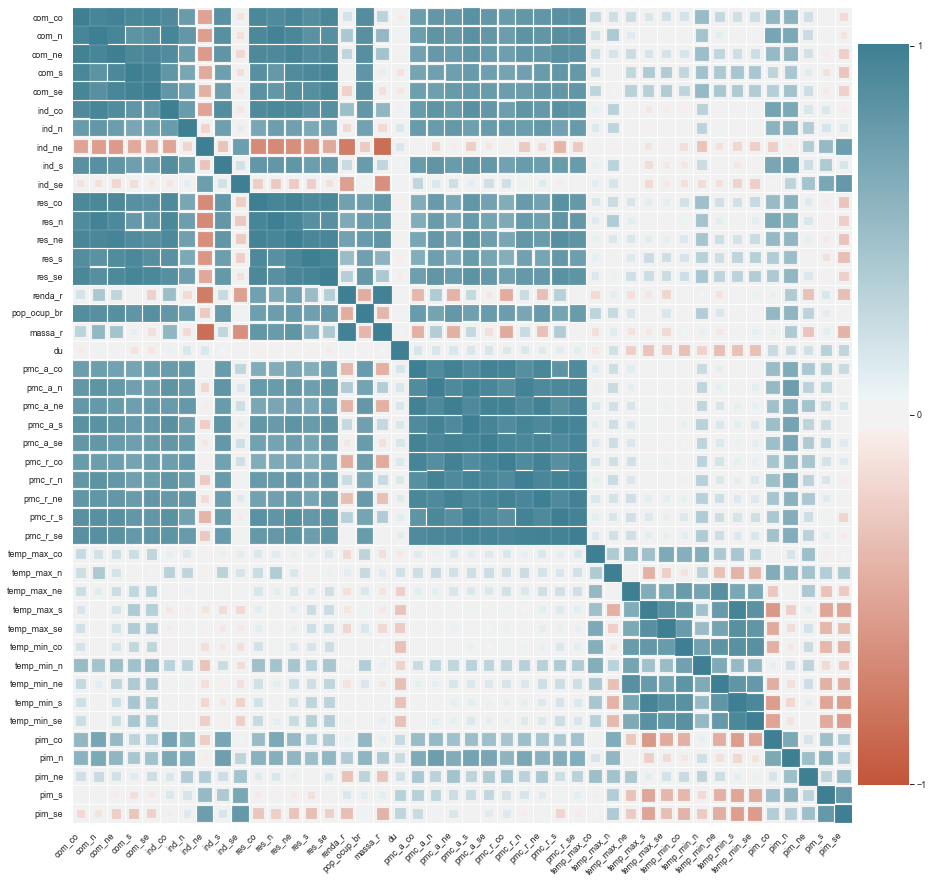

In [110]:
# Heatmap Correlation Plot
plt.figure(figsize=(15, 15))
corrplot(originaldata.iloc[:,:-6].corr(), size_scale=300)

#  A partir desse heatmap, a primeira impressão é a existência de blocos altamente correlacionados, 
# especialmente da mesma informação para diferentes macrorregiões, com poucas exceções. Dentre essas exceções,
# está o consumo energético industrial do NE e SE, temperaturas máximas do N e CO, e a bateria de variáveis sobre Prod. Ind.
# Outra informação que salta aos olhos é o fato de haver uma forte correlação entre comércio e consumo de energia comercial e 
# residencial, mais do que com a produção industrial.